# ❓ <font color='green'> <u> PROBLEM STATEMENT (Forest_Fires) </u>

## 🔵 <font color='blue'> PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

### <font color='candy'>➡Data Description:
* **month** -- month of the year: 'jan' to 'dec'
* **day** -- day of the week: 'mon' to 'sun'
* **FFMC** -- FFMC index from the FWI system: 18.7 to 96.20
* **DMC** -- DMC index from the FWI system: 1.1 to 291.3
* **DC** -- DC index from the FWI system: 7.9 to 860.6
* **ISI** -- ISI index from the FWI system: 0.0 to 56.10
* **temp** -- temperature in Celsius degrees: 2.2 to 33.30
* **RH** -- relative humidity in %: 15.0 to 100
* **wind** -- wind speed in km/h: 0.40 to 9.40
* **rain** -- outside rain in mm/m2 : 0.0 to 6.4
* **area** -- area of forest 
* **Size_Category** -- the burned area of the forest ( Small , Large) 

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> What are Neural Networks?</u></font> 
+ #### Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

+ #### Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

+ ###  <font color='candy'><u> Structure of Neural Networks
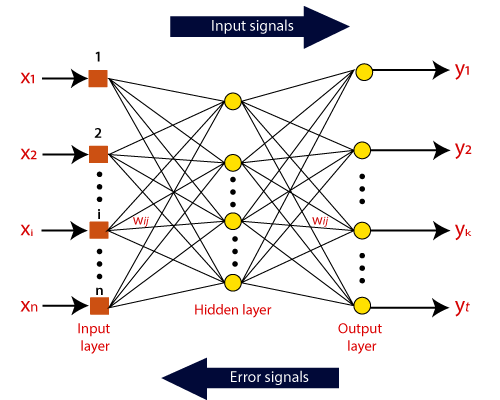

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
import keras_tuner as kf 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Datasets_Assignments/main/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(517, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

> * #### There are 517 records and 31 Variables.
> * #### All variables are of proper data type.
> * #### "size_category" is target column.
> * #### All variables are in provided range.
> * #### There is no null value observed.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

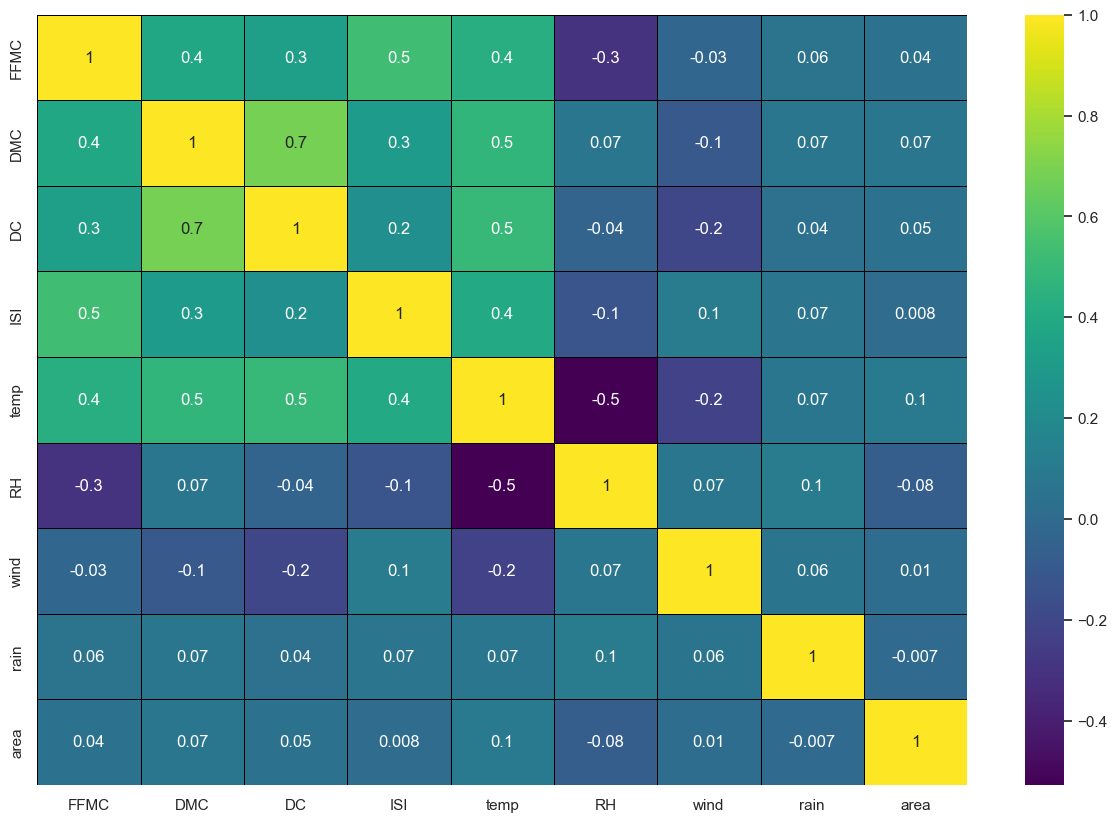

In [6]:
# Correation between Numerical variables:
Num_var = df.iloc[:,2:11]
plt.figure(figsize = (15,10))
sns.heatmap(Num_var.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

<Axes: ylabel='size_category'>

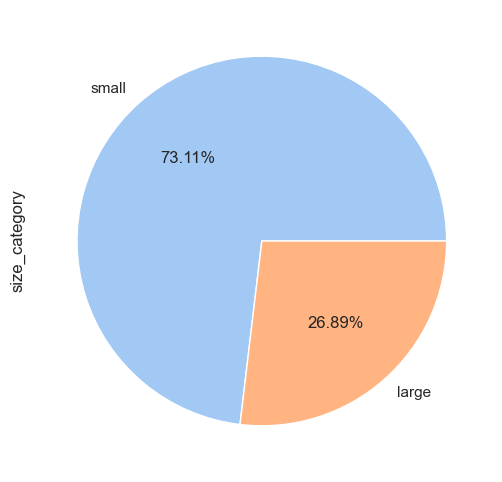

In [7]:
# Plottig Target Variable:
plt.figure(figsize = (8,6))
df['size_category'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

<Axes: >

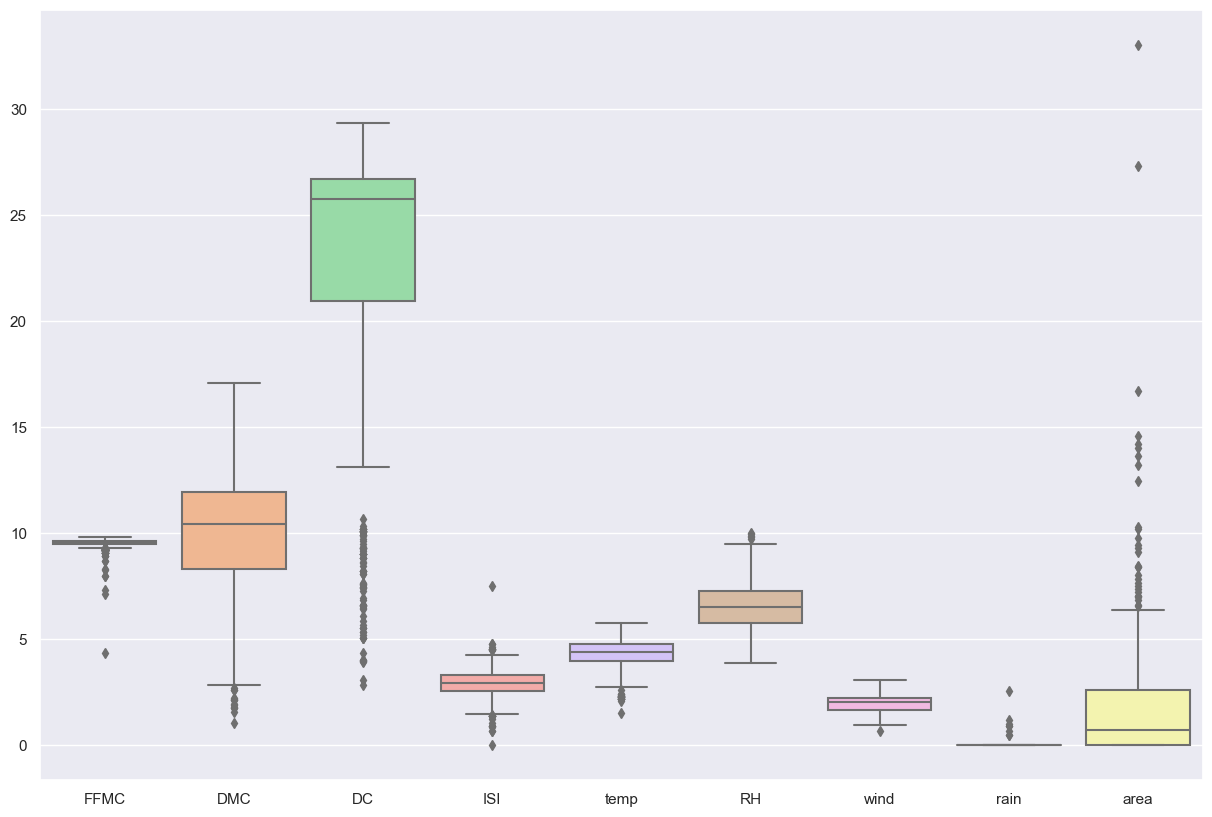

In [8]:
# Boxplot for Numerical Variables:
plt.figure(figsize =(15,10))
sns.boxplot(np.sqrt(Num_var))

<Axes: xlabel='month', ylabel='count'>

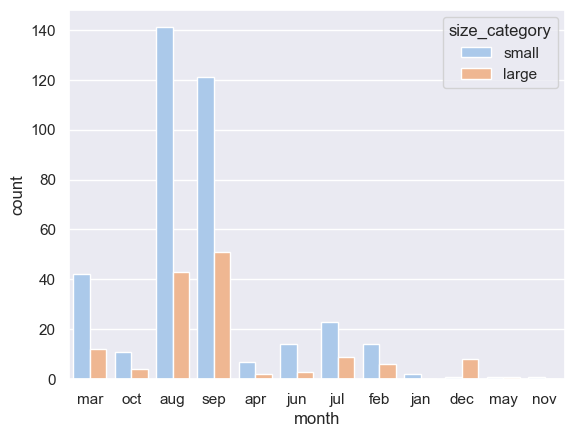

In [9]:
sns.countplot(x = df['month'], hue= df['size_category'])

<Axes: xlabel='temp', ylabel='DMC'>

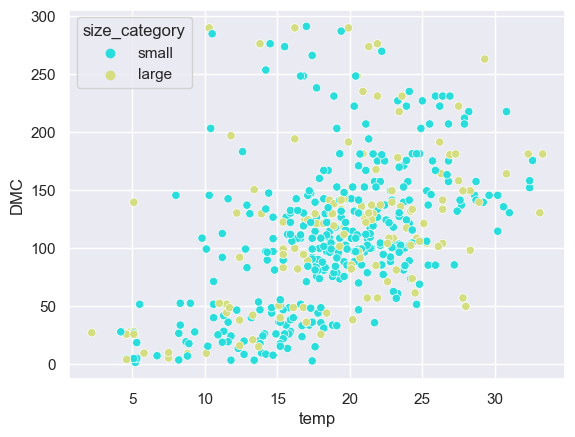

In [10]:
# Visualisation of classes:
sns.scatterplot(x = df['temp'], y = df['DMC'], hue = df['size_category'], palette= 'rainbow')

> * #### Variables "DC" and "DMC" are 70 % correlated.
> * #### Target Variable "size_category" have two categories large(27%) and small(73%) size of burned area of the forest. Given data is biased.
> * #### Many Variables have outliers but we don't remove them cause they may be important for our analysis.
> * #### Forest fires have high frequency in month of august and september.
> * #### In scatter plot we observe the overlapping of two classes.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Encoding:

In [11]:
# Encoding Target Variable using Lable Encoding:

In [12]:
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])
df['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [13]:
x = df.drop(columns = {'month','day','size_category'})
y = df['size_category']

### <font color = "green">➡ Standardisation:

In [14]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

### <font color = "green">➡ Train Test Split 

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [16]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (387, 28)
Shape of x_test:  (130, 28)
Shape of y_train:  (387,)
Shape of y_test (130,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

### <font color = "green">➡ With Early Stopping:

In [17]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [18]:
# As the classification problem is binary classification we use "Relu" activation function for hidden layer 
# and "Sigmoid" for outer layer:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])



Epoch 1/350

13/13 [==============================] - 2s 58ms/step - loss: 0.6994 - val_loss: 0.7577
Epoch 2/350
13/13 [==============================] - 0s 25ms/step - loss: 0.6739 - val_loss: 0.7325
Epoch 3/350
13/13 [==============================] - 0s 19ms/step - loss: 0.6548 - val_loss: 0.7096
Epoch 4/350
13/13 [==============================] - 0s 15ms/step - loss: 0.6383 - val_loss: 0.6917
Epoch 5/350
13/13 [==============================] - 0s 18ms/step - loss: 0.6250 - val_loss: 0.6770
Epoch 6/350
13/13 [==============================] - 0s 10ms/step - loss: 0.6143 - val_loss: 0.6637
Epoch 7/350
13/13 [==============================] - 0s 9ms/step - loss: 0.6035 - val_loss: 0.6503
Epoch 8/350
13/13 [==============================] - 0s 10ms/step - loss: 0.5944 - val_loss: 0.6389
Epoch 9/350
13/13 [==============================] - 0s 10ms/step - loss: 0.5863 - val_loss: 0.6311
Epoch 10/350
13/13 [==============================] - 0s 11ms/step - loss: 0.5792 - val_loss: 0.62

13/13 [==============================] - 0s 10ms/step - loss: 0.3711 - val_loss: 0.5032
Epoch 77/350
13/13 [==============================] - 0s 10ms/step - loss: 0.3689 - val_loss: 0.5015
Epoch 78/350
13/13 [==============================] - 0s 10ms/step - loss: 0.3663 - val_loss: 0.5012
Epoch 79/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3645 - val_loss: 0.5001
Epoch 80/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3618 - val_loss: 0.4986
Epoch 81/350
13/13 [==============================] - 0s 11ms/step - loss: 0.3595 - val_loss: 0.4974
Epoch 82/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3571 - val_loss: 0.4971
Epoch 83/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3546 - val_loss: 0.4961
Epoch 84/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3526 - val_loss: 0.4948
Epoch 85/350
13/13 [==============================] - 0s 10ms/step - loss: 0.3506 - val_loss: 0.4939
Epoch 86

Epoch 157/350
13/13 [==============================] - 0s 11ms/step - loss: 0.2184 - val_loss: 0.4165
Epoch 158/350
13/13 [==============================] - 0s 10ms/step - loss: 0.2162 - val_loss: 0.4163
Epoch 159/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2144 - val_loss: 0.4149
Epoch 160/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2124 - val_loss: 0.4156
Epoch 161/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2108 - val_loss: 0.4130
Epoch 162/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2104 - val_loss: 0.4112
Epoch 163/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2091 - val_loss: 0.4122
Epoch 164/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2075 - val_loss: 0.4102
Epoch 165/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2064 - val_loss: 0.4062
Epoch 166/350
13/13 [==============================] - 0s 10ms/step - loss: 0.2046 - val_

13/13 [==============================] - 0s 9ms/step - loss: 0.1348 - val_loss: 0.3464
Epoch 238/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1339 - val_loss: 0.3467
Epoch 239/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1331 - val_loss: 0.3478
Epoch 240/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1319 - val_loss: 0.3476
Epoch 241/350
13/13 [==============================] - 0s 13ms/step - loss: 0.1310 - val_loss: 0.3485
Epoch 242/350
13/13 [==============================] - 0s 10ms/step - loss: 0.1304 - val_loss: 0.3485
Epoch 243/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1299 - val_loss: 0.3468
Epoch 244/350
13/13 [==============================] - 0s 10ms/step - loss: 0.1293 - val_loss: 0.3475
Epoch 245/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1284 - val_loss: 0.3464
Epoch 246/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1276 - val_loss: 0.3452
E

Epoch 318/350
13/13 [==============================] - 0s 10ms/step - loss: 0.0845 - val_loss: 0.3071
Epoch 319/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0837 - val_loss: 0.3058
Epoch 320/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0838 - val_loss: 0.3054
Epoch 321/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0833 - val_loss: 0.3032
Epoch 322/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0827 - val_loss: 0.3029
Epoch 323/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0817 - val_loss: 0.3012
Epoch 324/350
13/13 [==============================] - 0s 10ms/step - loss: 0.0815 - val_loss: 0.3007
Epoch 325/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0811 - val_loss: 0.3007
Epoch 326/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0806 - val_loss: 0.2998
Epoch 327/350
13/13 [==============================] - 0s 10ms/step - loss: 0.0808 - val_

<Axes: >

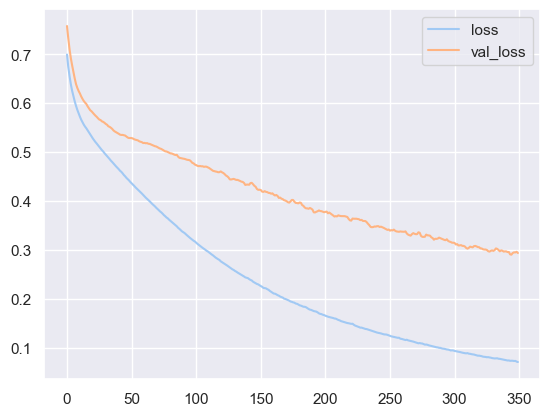

In [19]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [20]:
ypred = ann.predict(xtest)

5/5 [==============================] - 0s 5ms/step


In [21]:
ypred = ypred>0.5

In [22]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.91      0.97      0.94        95

    accuracy                           0.91       130
   macro avg       0.90      0.86      0.88       130
weighted avg       0.91      0.91      0.90       130



In [23]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 90.77%


> * #### With "Relu" activation function for hidden layer and "Sigmoid" activation function for outer layer gives good accuracy 91%. Let's see accuracy after Hyperparameter tunning.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING </u>

In [24]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [25]:
tunner = kf.RandomSearch(hyper, objective = 'val_accuracy',max_trials=3)

Reloading Tuner from .\untitled_project\tuner0.json


In [26]:
tunner.search(xtrain,ytrain, epochs=5, validation_data=(xtest,ytest))

In [27]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 128,
 'activation0': 'tanh',
 'optimizer': 'adam',
 'units1': 80,
 'activation1': 'relu',
 'units2': 56,
 'activation2': 'relu',
 'units3': 128,
 'activation3': 'sigmoid'}

In [28]:
# Model using new parameters:
model = tunner.get_best_models(num_models = 1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20353 (79.50 KB)
Trainable params: 20353 (79.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100

13/13 [==============================] - 2s 4ms/step - loss: 0.4752 - accuracy: 0.8036
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.7984
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8088
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3961 - accuracy: 0.8165
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.8372
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3547 - accuracy: 0.8501
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8579
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8605
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.8760
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.8837
Epoch 11

13/13 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9948
Epoch 81/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9974
Epoch 82/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 83/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9974
Epoch 84/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9974
Epoch 85/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9974
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9871
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9974
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 90/100


In [30]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 8ms/step - loss: 0.1996 - accuracy: 0.9385


[0.19961917400360107, 0.9384615421295166]

In [31]:
ypred = model.predict(xtest)
ypred

5/5 [==============================] - 0s 4ms/step


array([[9.9983579e-01],
       [1.0000000e+00],
       [9.9992645e-01],
       [9.9942023e-01],
       [9.8784852e-01],
       [9.9999005e-01],
       [2.3339546e-06],
       [9.9352211e-01],
       [9.9977660e-01],
       [9.9997801e-01],
       [9.9999630e-01],
       [9.9998039e-01],
       [9.9967086e-01],
       [9.9998033e-01],
       [9.9979466e-01],
       [9.9222416e-01],
       [9.9999481e-01],
       [9.9996555e-01],
       [1.5385655e-01],
       [1.3116279e-03],
       [1.0936107e-12],
       [1.2740686e-09],
       [4.4028052e-09],
       [8.4311278e-09],
       [9.9988991e-01],
       [9.9996763e-01],
       [9.9999470e-01],
       [5.6698841e-01],
       [9.9997878e-01],
       [9.9856418e-01],
       [9.9877554e-01],
       [1.9683911e-07],
       [9.9989009e-01],
       [9.9985898e-01],
       [9.9990261e-01],
       [9.6719646e-01],
       [9.9994147e-01],
       [4.4531717e-14],
       [9.9998790e-01],
       [9.9805528e-01],
       [9.9996746e-01],
       [9.998949

In [32]:
ypred = ypred > 0.5

In [33]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.94      0.98      0.96        95

    accuracy                           0.94       130
   macro avg       0.94      0.90      0.92       130
weighted avg       0.94      0.94      0.94       130



In [34]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 93.85%


In [35]:
ypred = pd.DataFrame(ypred)
ypred = ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Small
126,Small
127,Small
128,Small


In [37]:
df['ypred'] = ypred

<Axes: ylabel='ypred'>

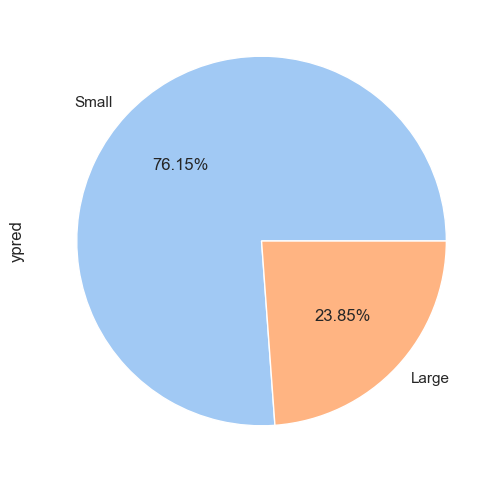

In [38]:
# Plottig Target Variable:
plt.figure(figsize = (8,6))
df['ypred'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### After Hyperparameter Accuracy improved 2% to 93.85%
> * #### In original dataset there are 73% Small fires and 27% Large fires, on other hand predicted small fires are 76% and large fires are 24% which is very less error.
> * #### Also the precision, recall and f1 score is also good for both the predicted classes.    

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___